<a href="https://colab.research.google.com/github/Mukul1Panwar/Machine_Learning/blob/main/Laptop_price(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the libraries

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("/content/laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [6]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [7]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [8]:
df.shape

(1303, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [10]:
df['Company'].value_counts().index

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Mediacom', 'Razer', 'Microsoft', 'Vero', 'Xiaomi', 'Chuwi',
       'Fujitsu', 'Google', 'LG', 'Huawei'],
      dtype='object', name='Company')

#EDA

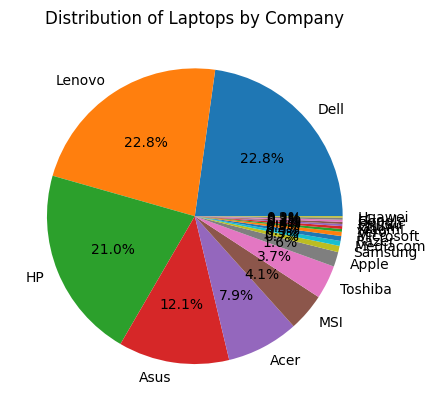

In [11]:
#plt.figure(figsize=(15,25))
plt.pie(x=df['Company'].value_counts().values, labels=df['Company'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Laptops by Company")
plt.show()

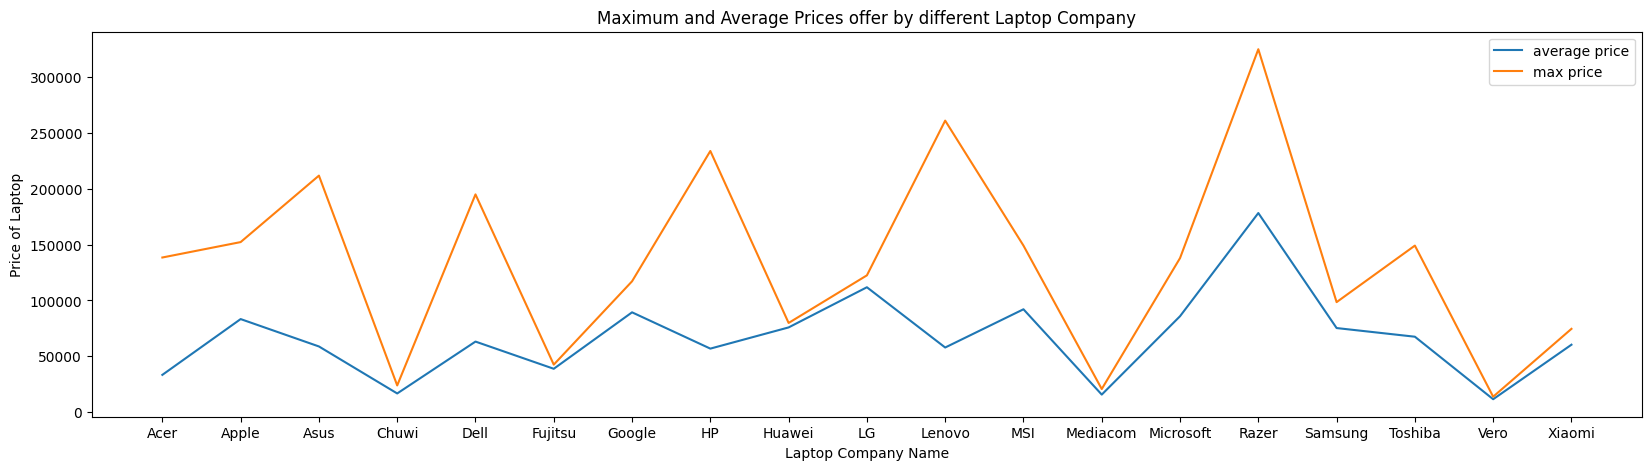

In [12]:
Y = df.groupby('Company')['Price'].mean()
Y1 = df.groupby('Company')['Price'].max()
plt.figure(figsize=(20,5))
plt.plot(Y,label='average price')
plt.plot(Y1,label='max price')
plt.legend()
plt.xlabel("Laptop Company Name")
plt.ylabel("Price of Laptop")
plt.title("Maximum and Average Prices offer by different Laptop Company")
plt.show()


Text(0.5, 1.0, 'Max Price for each Operation System')

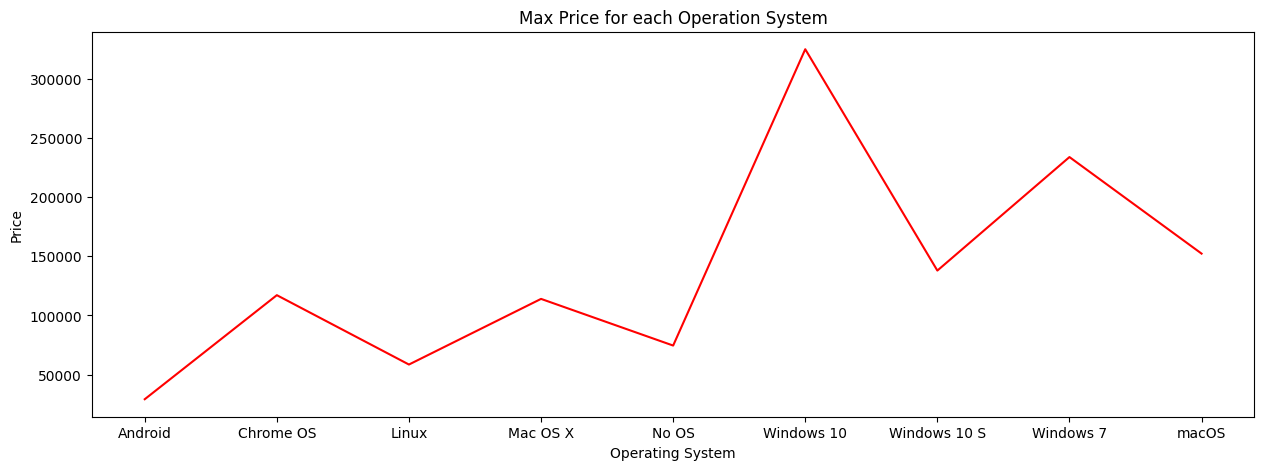

In [13]:
plt.figure(figsize=(15,5))
df.groupby('OpSys')['Price'].max().plot(kind='line', color='red')
plt.ylabel("Price")
plt.xlabel("Operating System")
plt.title("Max Price for each Operation System")

In [14]:
df.groupby('Ram')['Price'].mean()

,Price
Ram,
2,13552.857818
4,30613.221734
6,32778.193873
8,62913.713455
12,66037.277952
16,103191.166872
24,117553.440000
32,181849.215812
64,211788.000000


<Axes: xlabel='Ram', ylabel='Price'>

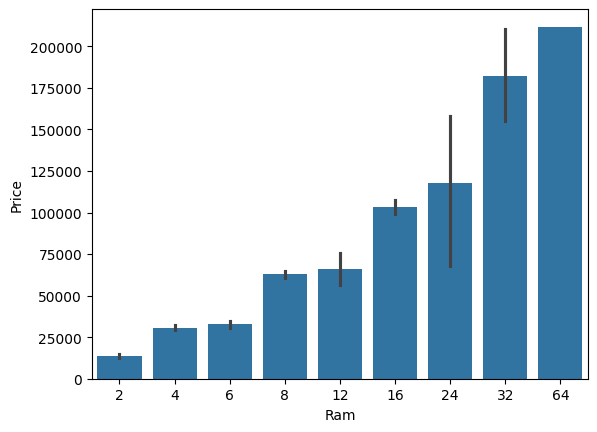

In [15]:
sns.barplot(data=df,x='Ram',y="Price")

Text(0.5, 1.0, 'Number of Laptops for each Company')

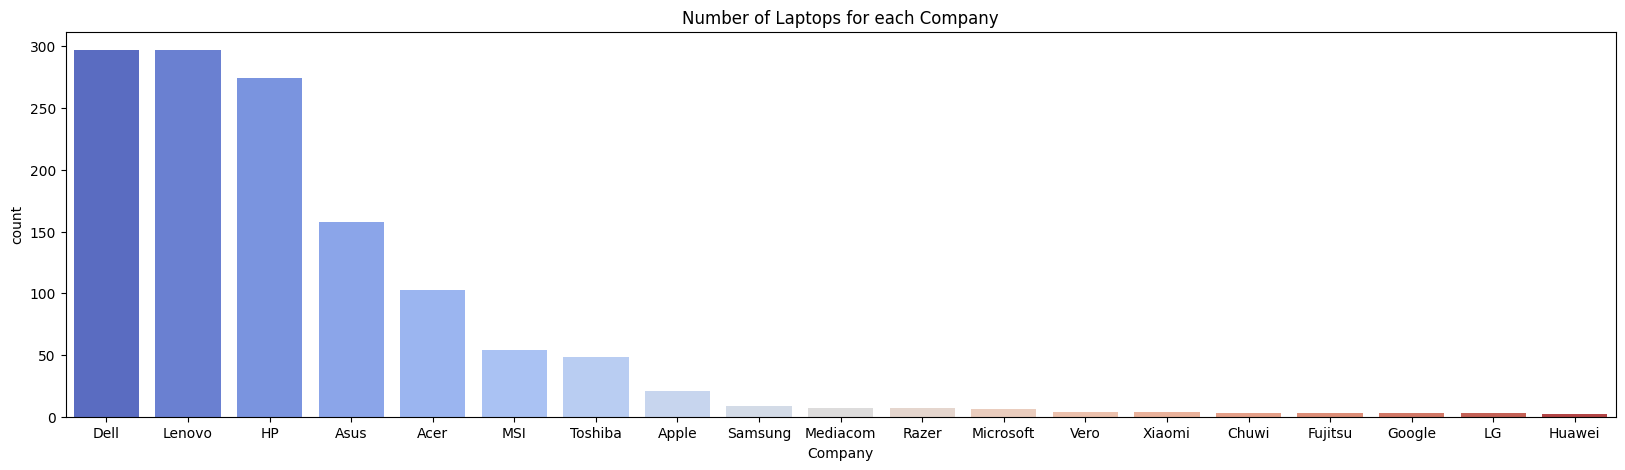

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='Company',order=df['Company'].value_counts().index,palette='coolwarm')
plt.title("Number of Laptops for each Company")
# plt.xticks(rotation='horizontal')


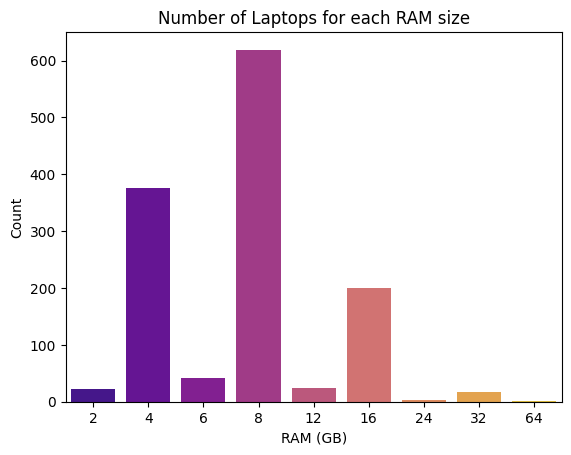

In [17]:
Y = df['Ram'].value_counts()
sns.barplot(x=Y.index, y=Y.values, palette='plasma')
plt.title("Number of Laptops for each RAM size")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

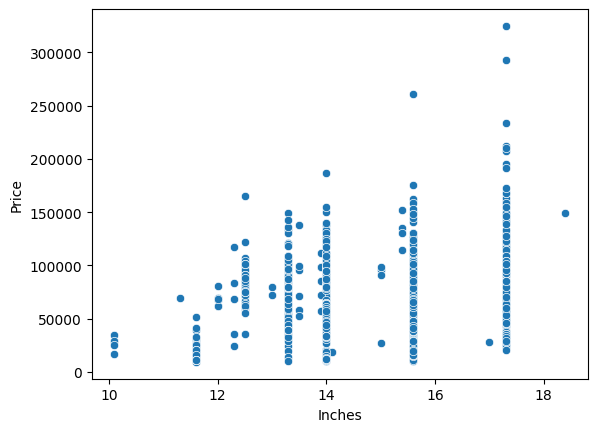

In [18]:
sns.scatterplot(data=df,x='Inches',y='Price')

<Axes: xlabel='TypeName', ylabel='count'>

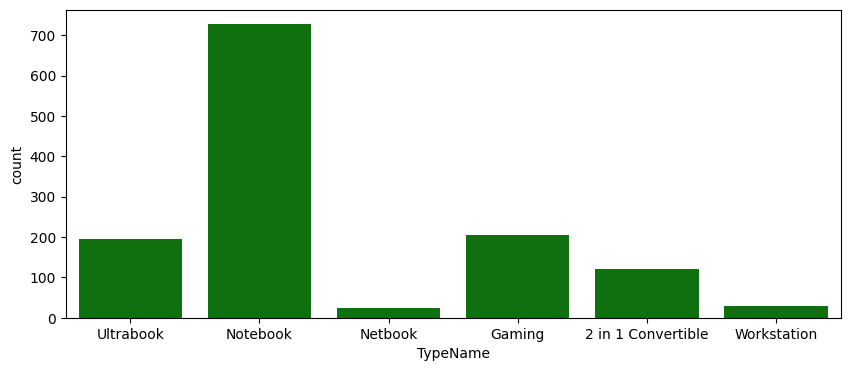

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='TypeName',color='green')

In [20]:
"""
plt.xticks(rotation='vertical')
viridis
set2
viridis"""

"\nplt.xticks(rotation='vertical')\nviridis\nset2\nviridis"

#Feature Engineering


In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [23]:
df = df.drop(columns='Gpu')

In [24]:
def cpu(input):
  if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
    return 'Windows'
  elif input == 'Mac OS X' or input == 'macOS':
    return 'Mac'
  else:
    return 'No Os/Linux/Android'

In [25]:
df['Os'] = df['OpSys'].apply(cpu)

In [26]:
df = df.drop(columns='OpSys')

In [27]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [28]:
def cpu(input):
  if input == 'Intel Core i5' or input == 'Intel Core i7' or input == 'Intel Core i3':
    return input
  elif input.split()[0] == 'Intel':
    return 'Other Intel Processor'
  elif input.split()[0] == 'AMD':
    return 'AMD'
  else:
    return 'Other Processor'


In [29]:
df['cpu'] = df['cpu_name'].apply(cpu)

In [30]:
df = df.drop(columns=['Cpu','cpu_name'])

In [31]:
df = df.drop(columns=['Memory','ScreenResolution'])

In [32]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Gpu_Brand,Os,cpu
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,Intel,Mac,Intel Core i5
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,Intel,Mac,Intel Core i5
2,HP,Notebook,15.6,8,1.86,30636.0000,0,Intel,No Os/Linux/Android,Intel Core i5
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,AMD,Mac,Intel Core i7
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,Intel,Mac,Intel Core i5


In [33]:
x = df.drop(columns='Price')
y = df['Price']


In [34]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [35]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((1042, 9), (1042,), (261, 9), (261,))

#Pipeline

In [36]:
cat = ['Company','TypeName','Gpu_Brand','Os','cpu']
num = ['Inches','Ram','Weight','Touchscreen']

In [84]:
# PIPELINE FOR LINEAR REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
    ('cat',OneHotEncoder(),cat),
    ('num',StandardScaler(),num)
    ]
)

lrg_pipeline = Pipeline(steps=[
      ('preprocessor',preprocessor),
      ('lg',LinearRegression())
])

lrg_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for linear regression {r2_score (Ytest,lrg_pipeline.predict(Xtest))}")

testing score for linear regression 0.7016892780143108


In [85]:
# PIPELINE FOR LASSO REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

l_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lasso',Lasso(alpha=1.0))
])

l_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for LASSO {r2_score(Ytest,l_pipeline.predict(Xtest))}")


testing score for LASSO 0.70172126473855


In [86]:
# PIPELINE FOR RIDGE REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

r_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('ridge',Ridge(alpha=1))
])

r_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for ridge {r2_score(Ytest,r_pipeline.predict(Xtest))}")


testing score for ridge 0.6976840091549787


In [125]:
# PIPELINE FOR RANDOMFORESTREGRESSOR

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=500, random_state=42))
   # The n_estimators parameter determines how many of these trees are built. Generally, a higher number of estimators leads to better performance but also increases computation time.
])


rf_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for RF {r2_score(Ytest,rf_pipeline.predict(Xtest))}")

print("Mean Absolute Error :",mean_absolute_error(Ytest,rf_pipeline.predict(Xtest)))

testing score for RF 0.783205581073587
Mean Absolute Error : 10647.506312208547


In [88]:
# PIPELINE FOR KNN

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('knn',KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(Xtrain,Ytrain)

print("testing score for KNN : ",r2_score(Ytest,knn_pipeline.predict(Xtest)))

testing score for KNN :  0.7068782270596304


In [89]:
# PIPELINE FOR xGBOOST

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('xgb',XGBRegressor(n_estimators=60,max_depth=5,learning_rate=0.5))
])

xgb_pipeline.fit(Xtrain,Ytrain)

print("testing score for KNN : ",r2_score(Ytest,xgb_pipeline.predict(Xtest)))

testing score for KNN :  0.7505792911511503


In [90]:
# PIPELINE FOR Gradient Boost

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

gb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('gb',GradientBoostingRegressor(n_estimators=500)) # an ensemble model that builds many small decision trees.
])

gb_pipeline.fit(Xtrain,Ytrain)

print("testing score for gb : ",r2_score(Ytest,gb_pipeline.predict(Xtest)))

testing score for gb :  0.7772270777286905


In [91]:
# PIPELINE FOR DECISION TREE

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

dt_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('dtr',DecisionTreeRegressor(max_depth=8))
])

dt_pipeline.fit(Xtrain,Ytrain)

print("testing score for decision tree:",r2_score(Ytest,dt_pipeline.predict(Xtest)))

testing score for decision tree: 0.7155803244472595


Best Performing models are GradientBoostingRegressor , XGBRegressor , RandomForestRegressor

# Testing the model

In [120]:
def laptop_pred(pipeline,input_data):
  input_df = pd.DataFrame([input_data])

  prediction = pipeline.predict(input_df)

  return prediction

In [123]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Gpu_Brand,Os,cpu
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,Intel,Mac,Intel Core i5
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,Intel,Mac,Intel Core i5
2,HP,Notebook,15.6,8,1.86,30636.0000,0,Intel,No Os/Linux/Android,Intel Core i5
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,AMD,Mac,Intel Core i7
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,Intel,Mac,Intel Core i5




*   testing score for RF 0.783205581073587


*   Mean Absolute Error : 10647.506312208547




In [134]:
input = {
    "Company": 'Apple',
    "TypeName": 'Ultrabook',
    "Inches": 15.4,
    "Ram": 16,
    "Weight": 1.83,
    "Touchscreen": 0,
    "Gpu_Brand": 'AMD',
    "Os": "Mac",
    "cpu" : "Intel Core i7"
}

prediction = laptop_pred(rf_pipeline,input)

print("Predicted Laptop Price : ₹",round(prediction[0],3))

Predicted Laptop Price : ₹ 136191.481
